# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Read in readmissions data provided
hospital_read_df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/hospital_readmit/data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# Deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

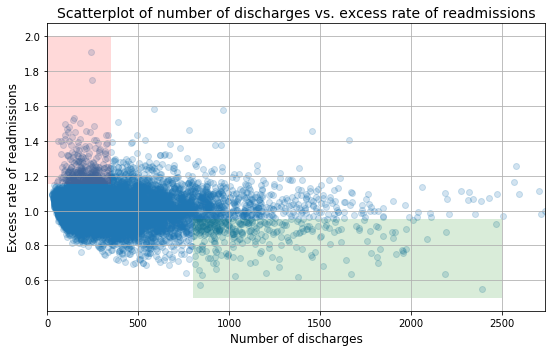

In [5]:
# Generate a scatterplot for number of discharges vs. excess rate of readmissions
# Lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

**Exercise A:** <br>

I do not agree with the above analysis because the data is not dug deep enough. For example, there is no Null Hypothesis, no p-value calculated and no α to test significance. Also, the study did not specify if that data is normally distributed. <br>

When it comes to this scatter plot, you cannot get a clear picture of the data and its outliers. Everything is so close together, zoomed out and there is no distinction with the color of the dots to help signify the size of the hospital. To be honest, it is hard to tell what the scatter plot is meant to display. <br>

In order to see if those recommendations they gave are wise, we will need to do a more thorough EDA.

**Exercise B:** <br>

The data fits normal conditions since it is random, appears to be independent since one hospital ERR does not likely affect the other and the size of the data is over 30. <br>
Ho = Distribution of excess readmission rate is equal among small hospitals (number of discharges < 100) and large hospitals (number of discharges >= 100). <br>
Ha = Distribution of excess readmission rate is not equal among small hospitals (number of discharges < 100) and large hospitals (number of discharges >= 100). <br>
α = 0.01

In [6]:
# Separating Hospitals by Size
large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 100]
small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]

# Finding the Excess Readmission Ratio for each
ERR_large = large['Excess Readmission Ratio']
ERR_small = small['Excess Readmission Ratio']

# Getting all of the important statistical information
print('Large Hospital Excess Readmission Ratio: ')
print(ERR_large.describe())
print('Small Hospital Excess Readmission Ratio: ')
print(ERR_small.describe())

Large Hospital Excess Readmission Ratio: 
count    10309.000000
mean         1.005762
std          0.094951
min          0.549500
25%          0.947800
50%          1.000800
75%          1.059200
max          1.909500
Name: Excess Readmission Ratio, dtype: float64
Small Hospital Excess Readmission Ratio: 
count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64


In [7]:
# Finding the Difference of Means between Large and Small Hospitals
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Computing the Test Statistic. Since small hospitals have a higer mean, they are substracted from.
hospital_diff = diff_of_means(ERR_small, ERR_large)

# Creating replicates 
h_replicates = np.empty(10000)
for i in range(len(h_replicates)):
    """Permuting Data"""
    hospitals_combined = np.concatenate((ERR_small, ERR_large))
    hospitals_perm = np.random.permutation(hospitals_combined)
    s_replicates = hospitals_perm[:len(ERR_small)]
    l_replicates = hospitals_perm[len(ERR_large):]
    # Drawing Replicates
    h_replicates[i] = diff_of_means(s_replicates, l_replicates)
    
# Calculating p-value for replicates being greater than or equal to the Observed Difference
p = np.sum(h_replicates >= hospital_diff) / len(h_replicates)

print('Observed Difference: ' + str(hospital_diff) +  ', p-value: ' + str(p))

Observed Difference: 0.0168563557945, p-value: 0


With the p-value being less than α, we can reject the Null Hypothesis, which means there is a statistical significant difference between the distribution excess readmission rate of small hospitals (number of discharges < 100) and large hospitals (number of discharges >= 100).

While the results do not change the statistical significance that there is a difference between small hospitals' ERR and large hospitals' ERR, that does not mean it is practically significant. We do not know each hospital's financials and where money is being spent. All we know is that smaller hospitals do have a higher excess readmission rate but how the hospitals deal with that is up to them because each case is different.

As mentioned earlier, this current plot is hard to distinguish because of how close points are together, the amount of points and the lack of clear distinction between large and small hospitals. However, scatter plots are always good at testing correlation because the direction of the scatter can clearly illustrate correlation.

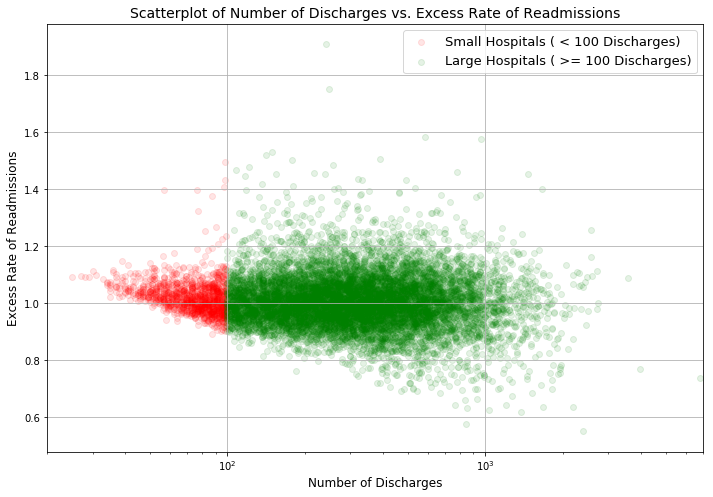

In [8]:
# Setting variable for Large and Small Hospitals
x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

# Setting the size of the plot and plotting the variable
fig, ax = plt.subplots(figsize=(10,7))
_ = ax.scatter(x_small, y_small, color='red', alpha=0.1)
_ = ax.scatter(x_large, y_large, color='green', alpha=0.1)

# Fixing the scales to make it easier to read and adding labels, title and legend
_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of Discharges', fontsize=12)
_ = ax.set_ylabel('Excess Rate of Readmissions', fontsize=12)
_ = ax.set_title('Scatterplot of Number of Discharges vs. Excess Rate of Readmissions', fontsize=14)
_ = ax.legend(['Small Hospitals ( < 100 Discharges)', 'Large Hospitals ( >= 100 Discharges)'], fontsize=13)

# Making it a grid and keeping it tight
ax.grid(True)
fig.tight_layout()

The above scatter plot is more centered and easier to see along with a clear separation between small and large hospitals.